In [1]:
from utils import *
from envs import *
from model import *
import numpy as np
from copy import deepcopy
import argparse
import pandas as pd
import ast
parser = argparse.ArgumentParser()
parser.add_argument('--episodes', type=int, required=False, help='episodes', default=1)
parser.add_argument('--tmax', type=int, required=False, help='tmax', default=100)

parser.add_argument('--goalcoords', type=float,nargs='+', required=False, help='goalcoords', default=[0.5])
parser.add_argument('--rsz', type=float, required=False, help='rsz', default=0.05)
parser.add_argument('--rmax', type=int, required=False, help='rmax', default=5)

parser.add_argument('--seed', type=int, required=False, help='seed', default=2020)
parser.add_argument('--pcinit', type=str, required=False, help='pcinit', default='uni')
parser.add_argument('--npc', type=int, required=False, help='npc', default=32)
parser.add_argument('--alpha', type=float, required=False, help='alpha', default=1.0)
parser.add_argument('--sigma', type=float, required=False, help='sigma', default=0.05)

parser.add_argument('--plr', type=float, required=False, help='plr', default=0.01)
parser.add_argument('--clr', type=float, required=False, help='clr', default=0.01)
parser.add_argument('--llr', type=float, required=False, help='llr', default=0.000) 
parser.add_argument('--alr', type=float, required=False, help='alr', default=0.000) 
parser.add_argument('--slr', type=float, required=False, help='slr', default=0.000)
parser.add_argument('--gamma', type=float, required=False, help='gamma', default=0.9)
parser.add_argument('--nact', type=int, required=False, help='nact', default=2)

parser.add_argument('--balpha', type=float, required=False, help='balpha', default=0.0)
parser.add_argument('--paramsindex', type=int,nargs='+', required=False, help='paramsindex', default=[0,1,2])
parser.add_argument('--noise', type=float, required=False, help='noise', default=0.000)

parser.add_argument('--datadir', type=str, required=False, help='datadir', default='./data/')
parser.add_argument('--figdir', type=str, required=False, help='figdir', default='./fig/')
parser.add_argument('--csvname', type=str, required=False, help='csvname', default='results')
args, unknown = parser.parse_known_args()


# training params
train_episodes = args.episodes
tmax = args.tmax

# env pararms
envsize = 1
maxspeed = 0.1
goalsize = args.rsz
startcoord = [-0.75]
goalcoords = args.goalcoords
seed = args.seed
initvelocity = 0.0
max_reward = args.rmax

#agent params
npc = args.npc
sigma = args.sigma
alpha = args.alpha
nact = args.nact

# noise params
noise = args.noise
paramsindex = args.paramsindex
piname = ''.join(map(str, paramsindex))
pcinit = args.pcinit

actor_eta = args.plr
critic_eta = args.clr
pc_eta = args.llr
sigma_eta = args.slr
constant_eta = args.alr
etas = [pc_eta, sigma_eta,constant_eta, actor_eta,critic_eta]
gamma = args.gamma
balpha = args.balpha

skip
skip
skip


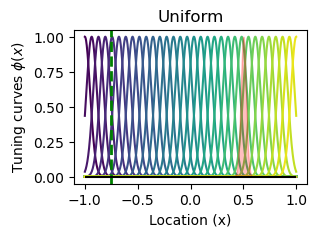

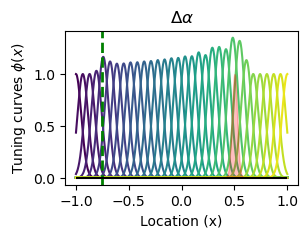

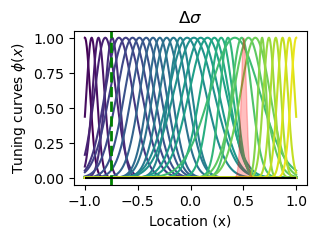

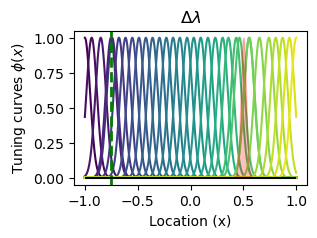

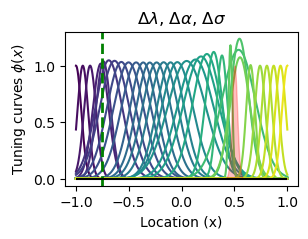

In [12]:
# plot example field 
ltypes = [0.0, 0.0001]
names_dict = {'llr': r'$\Delta\lambda$', 'alr': r'$\Delta\alpha$', 'slr': r'$\Delta\sigma$'}
for llr in ltypes:
    for slr in ltypes:
        for alr in ltypes:

            try:
                [logparams, latencys,cum_rewards, allcoords] = saveload(f"./data/1D_td_online_0.0ba_0.0ns_01234p_32n_0.01plr_0.01clr_{llr}llr_{alr}alr_{slr}slr_uni_2a_2020s_50000e_5rmax_0.05rsz",1,"load")
                
                name_components = []
                if llr > 0:
                    name_components.append(names_dict['llr'])
                if alr > 0:
                    name_components.append(names_dict['alr'])
                if slr > 0:
                    name_components.append(names_dict['slr'])
                name = ', '.join(name_components) if name_components else 'Uniform'
                
                f,ax = plt.subplots(figsize=(3,2))
                plot_pc(logparams, trial=-1,ax=ax)
                ax.set_title(name)
            except FileNotFoundError: print('skip')



In [30]:


# Load the CSV file with proper error handling
csv_file_path = './csvs/results_npc.csv'
df = pd.read_csv(csv_file_path)

# Ensure all necessary columns are of the correct type
df['npc'] = df['npc'].astype(int)
df['seed'] = df['seed'].astype(int)
df['plr'] = df['plr'].astype(float)
df['clr'] = df['clr'].astype(float)

df['llr'] = df['llr'].astype(float)
df['alr'] = df['alr'].astype(float)
df['slr'] = df['slr'].astype(float)


# Parameters
train_episodes = 50000
npcs = [4,8,16,32,64,128,256,512,1024]
seed_count = 10  # Specify the number of seeds to use

plrs = 0.01
clrs = 0.01
llrs = 0.0001
alrs = 0.0001
slrs = 0.0001

trial_len = 100  # Looks like you're trying to match this to the number of trials

# Initialize matrices to store scores and drifts
dxrs = np.zeros([len(npcs), seed_count, trial_len])

# Function to convert a string representation of array back to numpy array
def str_to_array(arr_str):
    # Ensure removal of newline characters and proper formatting of the string
    cleaned_str = arr_str.replace("\n", " ").replace('[ ', '[').replace(' ]', ']').replace('[', '').replace(']', '')
    # Ensure single spaces are replaced with a single comma
    cleaned_str = ','.join(cleaned_str.split())
    return np.array(ast.literal_eval(f"[{cleaned_str}]"))

# Fill the matrices with values from the CSV file
for i, row in df.iterrows():
    npc = row['npc']
    seed = row['seed']
    plr, clr, llr, alr, slr = row['plr'], row['clr'],row['llr'],row['alr'],row['slr']
    dxr_values = str_to_array(row['dxr'])

    if npc in npcs and plr==plrs and clr==clrs and llr==llrs and alr==alrs and slr==slrs and seed < seed_count:
        npc_idx = npcs.index(npc)
        dxrs[npc_idx, seed] = dxr_values

print(dxrs[:,0,-1])

[ 0.44906967  0.12196754  0.00181137  0.00366545 -0.00594249 -0.00604593
 -0.00491656 -0.00329469 -0.00093467]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


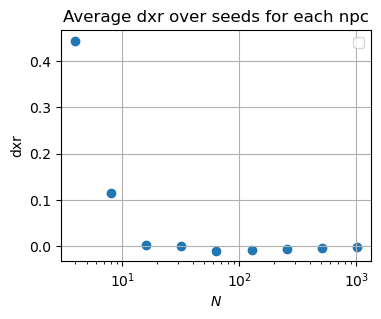

In [31]:

# Calculate the average dxr over all seeds for each npc
average_dxrs = np.mean(dxrs, axis=1)

# Plotting
# plt.figure(figsize=(4, 3))
# for idx, npc in enumerate(npcs):
#     plt.plot(np.linspace(0, train_episodes, trial_len), average_dxrs[idx], label=f'npc={npc}')

# plt.xlabel('Trials')
# plt.ylabel('Average dxr')
# plt.legend()
# plt.title('Average dxr over seeds for each npc')
# plt.grid(True)
# plt.show()


# Calculate the average dxr over all seeds for each npc
last_dxrs = average_dxrs[:,-1]

# Plotting
plt.figure(figsize=(4, 3))
plt.scatter(npcs, last_dxrs)

plt.xscale('log')
# plt.yscale('log')

plt.xlabel('$N$')
plt.ylabel('dxr')
plt.legend()
plt.title('Average dxr over seeds for each npc')
plt.grid(True)
plt.show()

In [36]:


# Load the CSV file with proper error handling
csv_file_path = './csvs/results_rmax.csv'
df = pd.read_csv(csv_file_path)

# Ensure all necessary columns are of the correct type
df['rmax'] = df['rmax'].astype(int)
df['seed'] = df['seed'].astype(int)
df['plr'] = df['plr'].astype(float)
df['clr'] = df['clr'].astype(float)

df['llr'] = df['llr'].astype(float)
df['alr'] = df['alr'].astype(float)
df['slr'] = df['slr'].astype(float)


# Parameters
train_episodes = 50000
rmaxs = [1,2,3,4,5,6,7,8,9,10]
seed_count = 10  # Specify the number of seeds to use

plrs = 0.01
clrs = 0.01
llrs = 0.0001
alrs = 0.0001
slrs = 0.0001

trial_len = 100  # Looks like you're trying to match this to the number of trials

# Initialize matrices to store scores and drifts
dxrs = np.zeros([len(rmaxs), seed_count, trial_len])

# Function to convert a string representation of array back to numpy array
def str_to_array(arr_str):
    # Ensure removal of newline characters and proper formatting of the string
    cleaned_str = arr_str.replace("\n", " ").replace('[ ', '[').replace(' ]', ']').replace('[', '').replace(']', '')
    # Ensure single spaces are replaced with a single comma
    cleaned_str = ','.join(cleaned_str.split())
    return np.array(ast.literal_eval(f"[{cleaned_str}]"))

# Fill the matrices with values from the CSV file
for i, row in df.iterrows():
    rmax = row['rmax']
    seed = row['seed']
    plr, clr, llr, alr, slr = row['plr'], row['clr'],row['llr'],row['alr'],row['slr']
    dxr_values = str_to_array(row['dxr'])

    if rmax in rmaxs and plr==plrs and clr==clrs and llr==llrs and alr==alrs and slr==slrs and seed < seed_count:
        rmax_idx = rmaxs.index(rmax)
        dxrs[rmax_idx, seed] = dxr_values

print(np.mean(dxrs[:,:,-1],axis=1))

[ 0.          0.          0.          0.          0.          0.
 -0.00462831 -0.00032186 -0.01018075  0.        ]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


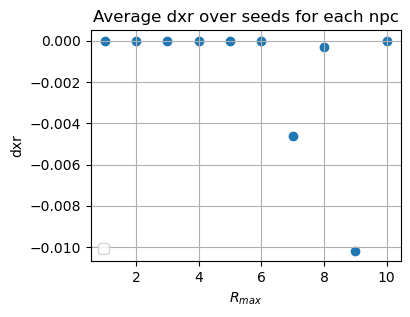

In [38]:

# Calculate the average dxr over all seeds for each npc
average_dxrs = np.mean(dxrs, axis=1)

# Calculate the average dxr over all seeds for each npc
last_dxrs = average_dxrs[:,-1]

# Plotting
plt.figure(figsize=(4, 3))
plt.scatter(rmaxs, last_dxrs)

# plt.xscale('log')
# plt.yscale('log')

plt.xlabel('$R_{max}$')
plt.ylabel('dxr')
plt.legend()
plt.title('Average dxr over seeds for each npc')
plt.grid(True)
plt.show()

In [27]:


# Load the CSV file with proper error handling
csv_file_path = './csvs/results_rsz.csv'
df = pd.read_csv(csv_file_path)

# Ensure all necessary columns are of the correct type
df['rsz'] = df['rsz'].astype(float)
df['seed'] = df['seed'].astype(int)

# Parameters
train_episodes = 50000
npcs = [0.005, 0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2, 0.25]
seed_count = 10  # Specify the number of seeds to use

trial_len = 100  # Looks like you're trying to match this to the number of trials

# Initialize matrices to store scores and drifts
dxrs = np.zeros([len(npcs), seed_count, trial_len])

# Function to convert a string representation of array back to numpy array
def str_to_array(arr_str):
    # Ensure removal of newline characters and proper formatting of the string
    cleaned_str = arr_str.replace("\n", " ").replace('[ ', '[').replace(' ]', ']').replace('[', '').replace(']', '')
    # Ensure single spaces are replaced with a single comma
    cleaned_str = ','.join(cleaned_str.split())
    return np.array(ast.literal_eval(f"[{cleaned_str}]"))

# Fill the matrices with values from the CSV file
for i, row in df.iterrows():
    npc = row['rsz']
    seed = row['seed']
    dxr_values = str_to_array(row['dxr'])

    if npc in npcs and seed < seed_count:
        npc_idx = npcs.index(npc)
        dxrs[npc_idx, seed] = dxr_values

print(dxrs[:,0,-1])

[ 0.01033836  0.01476889 -0.00073934 -0.01196285 -0.0205687  -0.03329506
  0.         -0.03259626 -0.03095501]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


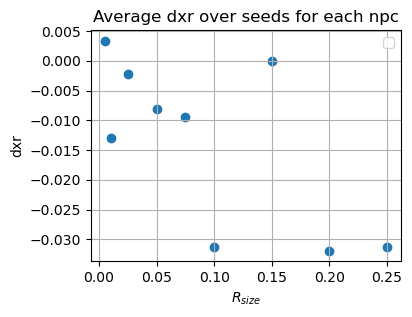

In [28]:

# Calculate the average dxr over all seeds for each npc
average_dxrs = np.mean(dxrs, axis=1)

# Calculate the average dxr over all seeds for each npc
last_dxrs = average_dxrs[:,-1]

# Plotting
plt.figure(figsize=(4, 3))
plt.scatter(npcs, last_dxrs)

# plt.xscale('log')
# plt.yscale('log')

plt.xlabel('$R_{size}$')
plt.ylabel('dxr')
plt.legend()
plt.title('Average dxr over seeds for each npc')
plt.grid(True)
plt.show()